In [4]:
import ase
import ase.build
from ase.db import connect
import itertools
from matplotlib import pyplot as plt
import numpy as np
from openbabel import openbabel as ob
import os
import pickle
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from schnetpack import Properties
import sys
from typing import Tuple

sys.path.append('..')
sys.path.append('../analyses')
import analyses.analysis as analysis

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [4]:
generated_db = '../analyses/molecules/generated/v5/nequip/interactions=4/l=5/channels=32/beta=1.0/step=best/generated_molecules.db'
generated_dists = []

with connect(generated_db) as conn:
    for row in conn.select():
        mol = row.toatoms()
        for atom1, atom2 in itertools.combinations(mol.positions, 2):
            generated_dists.append(np.linalg.norm(atom1 - atom2))

training_dists = []

model, params, config = analysis.load_model_at_step(
    '../workdirs/v6/nequip/interactions=4/l=5/channels=32', -1, run_in_evaluation_mode=True
)

with connect('../qm9_data/qm9-all.db') as conn:
    i = 0
    for row in conn.select():
        mol = row.toatoms()
        for atom1, atom2 in itertools.combinations(mol.positions, 2):
            training_dists.append(np.linalg.norm(atom1 - atom2))
        if i > 100:
            break

In [5]:
training_fig = go.Figure([go.Histogram(x=training_dists, xbins={'start': 0, 'end': 10, 'size': 0.5})])
training_fig.update_xaxes(title_text='Distance (Å)')
training_fig

In [ ]:
generated_fig = go.Figure([go.Histogram(x=generated_dists, xbins={'start': 0, 'end': 10, 'size': 0.5})])
generated_fig.update_xaxes(title_text='Distance (Å)')
generated_fig



Fusing .mol_dict files in folder ../analyses/molecules/generated/v6/nequip/interactions=4/l=5/channels=128/beta=10.0/step=1000000...
...done!


Text(0.5, 1.0, 'asdf')

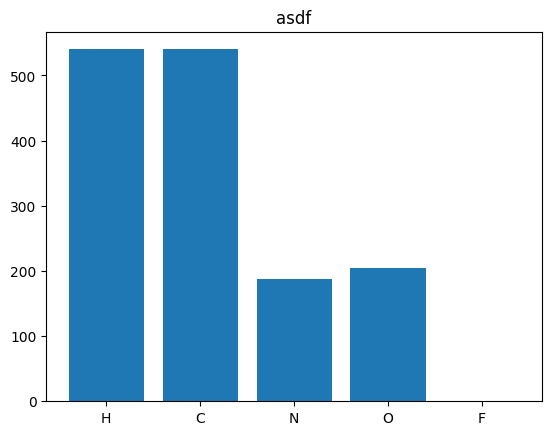

In [22]:
mol_dict = analysis.get_mol_dict('../analyses/molecules/generated/v6/nequip/interactions=4/l=5/channels=128/beta=10.0/step=1000000')
atom_type_list = np.array([])
for n_atoms in mol_dict:
    for atoms in mol_dict[n_atoms][Properties.Z]:
        atom_type_list = np.concatenate([atom_type_list, atoms])

atom_type_counts = {'H': 0, 'C': 0, 'N': 0, 'O': 0, 'F': 0}
element_numbers = {1: 'H', 6: 'C', 7: 'N', 8: 'O', 9: 'F'}
for atom_type in atom_type_list:
    atom_type_counts[element_numbers[atom_type]] += 1

plt.bar(atom_type_counts.keys(), atom_type_counts.values())
plt.title("asdf")

Text(0.5, 1.0, 'asdf')

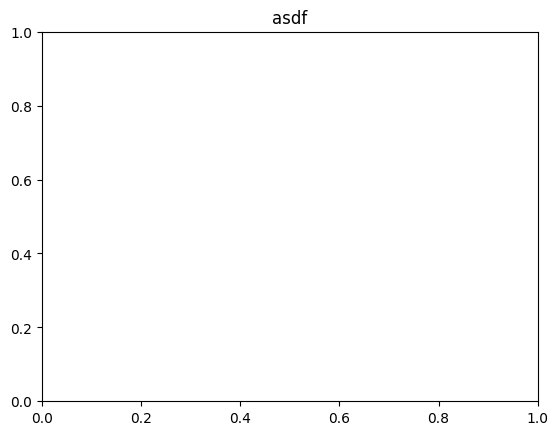

In [21]:
plt.title("asdf")